In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,FDU32,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,NCT54,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,FDW08,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,FDJ22,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,FDF47,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [4]:
test_data.head()

,Item_ID,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type
0,DRM23,10.156725,Snack Foods,119.319482,OUT013,1999,High,Tier 3
1,FDG47,10.434425,Household,263.600449,OUT018,1987,High,Tier 3
2,FDN21,11.953589,Health and Hygiene,246.286990,OUT018,1997,High,Tier 1
3,FDZ23,14.948546,Dairy,136.200508,OUT046,2004,Medium,Tier 2
4,FDC16,11.080042,Canned,173.145664,OUT018,2009,Medium,Tier 3


In [5]:
train_data.isnull().sum()

Item_ID                 0
Item_W                  0
Item_Type               0
Item_MRP                0
Outlet_ID               0
Outlet_Year             0
Outlet_Size             0
Outlet_Location_Type    0
Sales                   0
dtype: int64

In [6]:
train_data.shape , test_data.shape

((87864, 9), (37656, 8))

In [7]:
train_data.drop(columns=['Item_ID'],axis = 1,inplace = True)

In [8]:
train_data.groupby('Item_Type')['Item_MRP','Item_W'].mean()

<ipython-input-8-2dedf5b68f1a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_data.groupby('Item_Type')['Item_MRP','Item_W'].mean()


,Item_MRP,Item_W
Item_Type,,
Baking Goods,150.702459,15.053796
Breads,147.199312,15.270986
Breakfast,156.858735,16.637266
Canned,153.352637,16.179592
Dairy,155.376347,16.564873
Frozen Foods,154.739848,16.436911
Fruits and Vegetables,147.637898,15.340384
Hard Drinks,151.503811,14.901788
Health and Hygiene,154.309473,16.252626


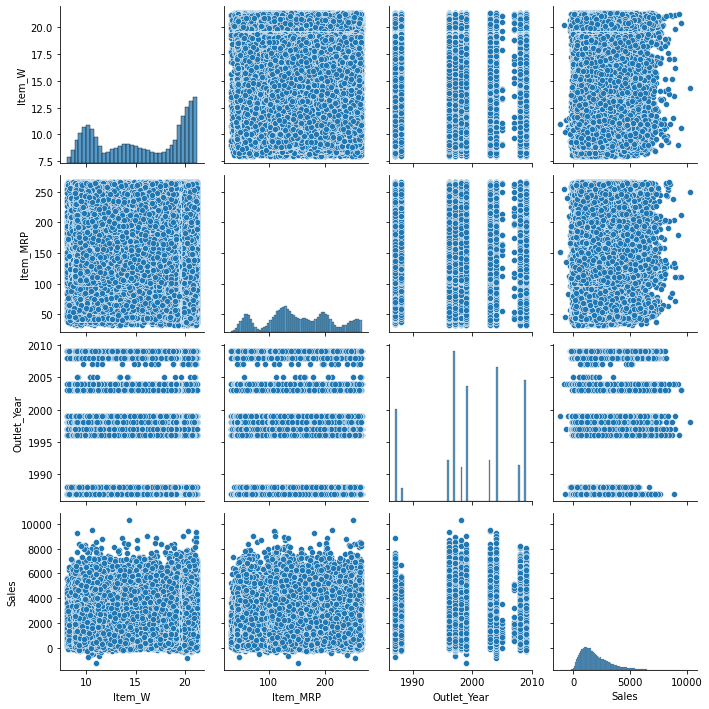

In [9]:
sns.pairplot(train_data)

In [10]:
train_data.Outlet_ID.value_counts()

OUT035    24071
OUT046    20850
OUT018    17156
OUT049    13356
OUT013    12431
Name: Outlet_ID, dtype: int64

<AxesSubplot:xlabel='Outlet_ID', ylabel='Outlet_Year'>

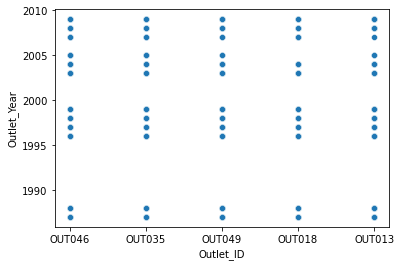

In [11]:
sns.scatterplot(x = 'Outlet_ID',y = 'Outlet_Year',data = train_data)

In [12]:
train_data.groupby(['Outlet_Size','Outlet_Location_Type'])['Sales'].count()

Outlet_Size  Outlet_Location_Type
High         Tier 1                   3807
             Tier 2                   3059
             Tier 3                   5701
Medium       Tier 1                   4995
             Tier 2                   3417
             Tier 3                  18271
Small        Tier 1                  24765
             Tier 2                  18777
             Tier 3                   5072
Name: Sales, dtype: int64

In [13]:
train_data.head()

,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


<AxesSubplot:>

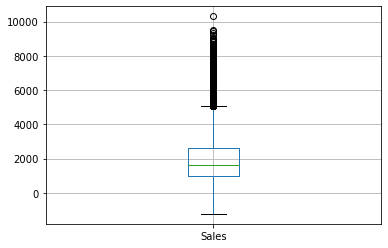

In [14]:
train_data.boxplot(column = 'Sales')

In [15]:
q1 = train_data.quantile(q = 0.25)
q3 = train_data.quantile(q = 0.75)
iqr = q3 - q1
print('IQR for train :',iqr)

IQR for train : Item_W            9.001278
Item_MRP         84.687030
Outlet_Year       7.000000
Sales          1648.808061
dtype: float64


In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [17]:
lowprice,uppprice = remove_outlier(train_data['Sales'])
train_data['Sales']=np.where(train_data['Sales']>uppprice,uppprice,train_data['Sales'])
train_data['Sales']=np.where(train_data['Sales']<lowprice,lowprice,train_data['Sales'])

In [18]:
lowprice,uppprice = remove_outlier(train_data['Item_MRP'])
train_data['Item_MRP']=np.where(train_data['Item_MRP']>uppprice,uppprice,train_data['Item_MRP'])
train_data['Item_MRP']=np.where(train_data['Item_MRP']<lowprice,lowprice,train_data['Item_MRP'])

In [19]:
train_data.skew()

Item_W        -0.179534
Item_MRP       0.055661
Outlet_Year   -0.443312
Sales          0.854649
dtype: float64

<AxesSubplot:>

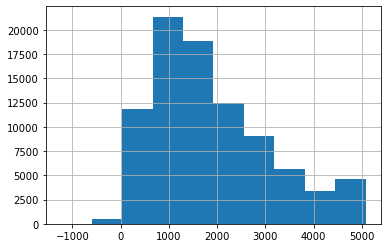

In [20]:
train_data['Sales'].hist()

<AxesSubplot:>

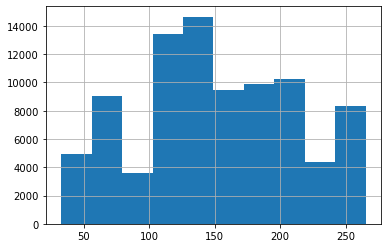

In [21]:
train_data['Item_MRP'].hist()

In [22]:
train_data.head()

,Item_W,Item_Type,Item_MRP,Outlet_ID,Outlet_Year,Outlet_Size,Outlet_Location_Type,Sales
0,21.027499,Baking Goods,197.352319,OUT046,2004,Small,Tier 2,2689.457781
1,21.102371,Meat,148.250214,OUT035,1987,Small,Tier 1,3437.350375
2,20.882263,Hard Drinks,205.465010,OUT035,1999,Small,Tier 3,3129.967268
3,21.050435,Starchy Foods,253.417583,OUT046,1996,Small,Tier 1,1306.514376
4,21.247876,Baking Goods,240.871039,OUT035,1988,Small,Tier 3,1739.769829


In [23]:
train_data.corr()

,Item_W,Item_MRP,Outlet_Year,Sales
Item_W,1.000000,-0.022830,0.009632,0.000800
Item_MRP,-0.022830,1.000000,-0.009837,0.014094
Outlet_Year,0.009632,-0.009837,1.000000,-0.037117
Sales,0.000800,0.014094,-0.037117,1.000000


In [24]:
train_data.drop(['Item_Type','Outlet_ID'],axis=1,inplace = True)

In [25]:
test_data.drop(['Item_ID','Item_Type','Outlet_ID'],axis = 1,inplace = True)

In [26]:
data = pd.get_dummies(train_data)

In [27]:
data_test = pd.get_dummies(test_data)

In [28]:
scaler1 = MinMaxScaler()
data[['Item_W','Item_MRP']]=scaler1.fit_transform(data[['Item_W','Item_MRP']])
scaler2 = MinMaxScaler()
data_test[['Item_W','Item_MRP']]=scaler2.fit_transform(data_test[['Item_W','Item_MRP']])

In [29]:
data_test.columns

Index(['Item_W', 'Item_MRP', 'Outlet_Year', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3'],
      dtype='object')

In [30]:
data.columns

Index(['Item_W', 'Item_MRP', 'Outlet_Year', 'Sales', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3'],
      dtype='object')

In [31]:
y = data['Sales']
X = data.drop(columns=['Sales'])

In [57]:
data_test

,Item_W,Item_MRP,Outlet_Year,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,0.333785,0.371765,1999,1,0,0,0,0,1
1,0.350463,0.993066,1987,1,0,0,0,0,1
2,0.441697,0.918511,1997,1,0,0,1,0,0
3,0.621561,0.444458,2004,0,1,0,0,1,0
4,0.389236,0.603550,2009,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
37651,0.106971,0.625894,2009,0,1,0,0,0,1
37652,0.123186,0.504197,2009,0,1,0,0,0,1
37653,0.063431,0.493159,1997,0,0,1,1,0,0
37654,0.124688,0.258196,2009,0,1,0,0,0,1


In [58]:
data

,Item_W,Item_MRP,Outlet_Year,Sales,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,0.983217,0.707875,2004,2689.457781,0,0,1,0,1,0
1,0.988864,0.496505,1987,3437.350375,0,0,1,1,0,0
2,0.972262,0.742797,1999,3129.967268,0,0,1,0,0,1
3,0.984947,0.949219,1996,1306.514376,0,0,1,1,0,0
4,0.999840,0.895210,1988,1739.769829,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
87859,0.150989,0.492801,1987,4975.646052,0,1,0,0,0,1
87860,0.246396,0.409186,1987,2252.492755,0,1,0,0,1,0
87861,0.255943,0.370716,1997,2716.058050,0,1,0,1,0,0
87862,0.756212,0.820072,1988,991.857233,0,1,0,0,0,1


In [35]:
features = list(set(features))

In [37]:
features

['Item_MRP',
 'Outlet_Location_Type_Tier 3',
 'Outlet_Size_High',
 'Outlet_Size_Small',
 'Outlet_Size_Medium',
 'Outlet_Location_Type_Tier 1',
 'Outlet_Year',
 'Outlet_Location_Type_Tier 2']

In [43]:
df_train=X_train[features]

In [42]:
y_train=pd.DataFrame(y_train)

In [50]:
df=pd.concat([df_train,y_train],axis=1)


In [ ]:
df_test=X_train[features]
y_train=pd.DataFrame(y_train)

In [44]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,3 hours 26 mins
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month and 1 day
H2O_cluster_name:,H2O_from_python_Ayush_yax10z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.248 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [59]:
hf_train = h2o.H2OFrame(df)
hf_test = h2o.H2OFrame(data_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [52]:
y='Sales'
x=hf_train.columns
x.remove(y)

In [55]:
aml = H2OAutoML(max_models=20,seed=1)
aml.train(x=x,y=y,training_frame=hf_train)

AutoML progress: |█
14:06:14.280: AutoML: XGBoost is not available; skipping it.
14:06:14.280: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
14:06:14.280: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_6_AutoML_4_20211108_140614

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 1474442.8200737645
RMSE: 1214.266371136813
MAE: 981.9799086444956
RMSLE: NaN
R^2: 0.031091040335022857
Mean Residual Deviance: 1474442.8200737645
Null degrees of freedom: 9921
Residual degrees of freedom: 9914
Null deviance: 15098972410.395428
Residual deviance: 14629421660.771893
AIC: 169105.42784906863

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 1486570.13493793

In [56]:
lb = aml.leaderboard
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_6_AutoML_4_20211108_140614,1.48657e+06,1219.25,1.48657e+06,981.41,nan
StackedEnsemble_AllModels_3_AutoML_4_20211108_140614,1.48692e+06,1219.39,1.48692e+06,981.326,nan
StackedEnsemble_AllModels_4_AutoML_4_20211108_140614,1.48695e+06,1219.41,1.48695e+06,981.329,nan
StackedEnsemble_AllModels_2_AutoML_4_20211108_140614,1.48695e+06,1219.41,1.48695e+06,981.329,nan
GBM_5_AutoML_4_20211108_140614,1.4872e+06,1219.51,1.4872e+06,981.286,nan
StackedEnsemble_BestOfFamily_4_AutoML_4_20211108_140614,1.48728e+06,1219.54,1.48728e+06,981.421,nan
StackedEnsemble_AllModels_1_AutoML_4_20211108_140614,1.48734e+06,1219.57,1.48734e+06,981.59,nan
StackedEnsemble_BestOfFamily_3_AutoML_4_20211108_140614,1.48737e+06,1219.58,1.48737e+06,981.458,nan
GBM_2_AutoML_4_20211108_140614,1.4874e+06,1219.59,1.4874e+06,981.507,nan
StackedEnsemble_BestOfFamily_2_AutoML_4_20211108_140614,1.48754e+06,1219.65,1.48754e+06,981.67,nan


In [60]:
preds = aml.predict(hf_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [61]:
df = hf_test.cbind(preds)
df.head(2)

Item_W,Item_MRP,Outlet_Year,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,predict
0.333785,0.371765,1999,1,0,0,0,0,1,1926.01
0.350463,0.993066,1987,1,0,0,0,0,1,1984.04


In [62]:
res = df[:, [ "predict"]]
res.head(2)

predict
1926.01
1984.04


In [63]:
res.set_names(['Sales'])

Sales
1926.01
1984.04
1960.15
1877.94
1603.27
1915.77
1897.11
2058.07
1869.56
1861.18


In [64]:
h2o.export_file(res, path = "try2.csv", force = True)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
